In [504]:
#FIrst Look at the DATA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from math import sin, cos, sqrt, atan2, radians
%matplotlib inline

# 1) Does the proximity to city center mean higher price?
# 2) I tend to find it easy to book a place with high amount of reviews, distance to city centre and price.lets investigate 
    # this reality
# 3) where is the best location, pricing and property type?


df_listings = pd.read_csv('./Desktop/KIS/seattle/listings.csv')

# -- CHECK COLUMNS TYPEs & MISSING DATA -- 
def df_cat_and_qnt_details(df):
    
    '''
    INPUT - df - pandas dataframe which is read csv
    OUTPUT - return the lists of column names of both full and non-full categorical and quantitative columns 
        [0] df_cat_all_Values_ColName,
        [1] df_cat_missing_Values_ColName, 
        [2] df_qnt_all_Values_ColName, 
        [3] df_qnt_missing_Values_ColName    
    '''  
    print("rows: ", df.shape[0], "Columns: ", df.shape[1])
    
    print("- Identify categorical columns in the DFs -")
    df_cat = df.select_dtypes(include=['object'])
    print("categorical columns: ", df_cat.shape[1]) 
    
    print("- categorical columns with no missing values -")
    df_cat_all_Values = np.sum(np.sum(df_cat.isnull())/df_cat.shape[0] == 0)
    print("Categorical Columns with all data: ", df_cat_all_Values)
    
    #categorical columns Names with no missing values
    df_cat_all_Values_ColName = df_cat.columns[np.sum(df_cat.isnull())==0].tolist()
    #categorical columns Names with missing values
    df_cat_missing_Values_ColName = df_cat.columns[np.sum(df_cat.isnull())!=0].tolist()
    
    print("- Identify Quantitative columns in the DFs -")
    df_qnt = df.select_dtypes(include=['int64', 'float64'])
    print("Quantitative Columns: ", df_qnt.shape[1])
    
    print("- Quantitative columns Names with no missing values -")
    df_qnt_all_Values = np.sum(np.sum(df_qnt.isnull())/df_qnt.shape[0] == 0)
    print("Quantitative Columns with all data:", df_qnt_all_Values)
    print()
    
    #Quantitative columns Names with missing values
    df_qnt_all_Values_ColName = df_qnt.columns[np.sum(df_qnt.isnull())==0].tolist()
    #Quantitative columns Names with missing values
    df_qnt_missing_Values_ColName = df_qnt.columns[np.sum(df_qnt.isnull())!=0].tolist()
    
    #return the columns names of both full and non-full categorical and quantitative columns
    return df_cat_all_Values_ColName, df_cat_missing_Values_ColName, df_qnt_all_Values_ColName, df_qnt_missing_Values_ColName


In [505]:
#print the list of column names which are Categorical with all values and quantitative with all values in the 'listings' and 'review' data
print("listings")
df_listings_dets = df_cat_and_qnt_details(df_listings)

listings
rows:  3818 Columns:  92
- Identify categorical columns in the DFs -
categorical columns:  62
- categorical columns with no missing values -
Categorical Columns with all data:  32
- Identify Quantitative columns in the DFs -
Quantitative Columns:  30
- Quantitative columns Names with no missing values -
Quantitative Columns with all data: 15



In [623]:
#[0] df_cat_all_Values_ColName, [1] df_cat_missing_Values_ColName, [2] df_qnt_all_Values_ColName, [3] df_qnt_missing_Values_ColName 
df_listings_dets

(['listing_url',
  'last_scraped',
  'name',
  'description',
  'experiences_offered',
  'picture_url',
  'host_url',
  'host_verifications',
  'street',
  'neighbourhood_cleansed',
  'neighbourhood_group_cleansed',
  'city',
  'state',
  'market',
  'smart_location',
  'country_code',
  'country',
  'is_location_exact',
  'room_type',
  'bed_type',
  'amenities',
  'price',
  'extra_people',
  'calendar_updated',
  'has_availability',
  'calendar_last_scraped',
  'requires_license',
  'jurisdiction_names',
  'instant_bookable',
  'cancellation_policy',
  'require_guest_profile_picture',
  'require_guest_phone_verification'],
 ['summary',
  'space',
  'neighborhood_overview',
  'notes',
  'transit',
  'thumbnail_url',
  'medium_url',
  'xl_picture_url',
  'host_name',
  'host_since',
  'host_location',
  'host_about',
  'host_response_time',
  'host_response_rate',
  'host_acceptance_rate',
  'host_is_superhost',
  'host_thumbnail_url',
  'host_picture_url',
  'host_neighbourhood',
  '

In [507]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [508]:
#Column 'Price' is considered a Categorical Column, but it is expected to be a quantitative as an amount and is a column of interest
print(pd.DataFrame(df_listings, columns=['price']))

        price
0      $85.00
1     $150.00
2     $975.00
3     $100.00
4     $450.00
...       ...
3813  $359.00
3814   $79.00
3815   $93.00
3816   $99.00
3817   $87.00

[3818 rows x 1 columns]


In [509]:
#want to convert the string/object format of the price into a float which can be made for quantitative purpose
df_listings['price'] = [price.strip('$') for price in df_listings.price]
df_listings['price'] = [price.replace(',', '') for price in df_listings.price]
df_listings['price'] = df_listings.price.astype(float)
print(pd.DataFrame(df_listings, columns=['price']), df_listings['price'].dtypes)

      price
0      85.0
1     150.0
2     975.0
3     100.0
4     450.0
...     ...
3813  359.0
3814   79.0
3815   93.0
3816   99.0
3817   87.0

[3818 rows x 1 columns] float64


In [510]:
#Now that the 'price' column is quantitative, we can have a look at the columns we're interested in
df_listings.drop(df_listings.columns.difference(['review_scores_rating', 'number_of_reviews', 
                                                 'neighbourhood', 'property_type','room_type', 'bed_type','latitude','longitude','price']), axis=1, inplace=True)

In [577]:
#here, we will add an additional Column which we can use the below Lat/Lon distance between 
#the city center and the neighbourhoods to calculate the distance

#Seattle City Center: 47.6103 lat and 122.3341 long

# approximate radius of earth in km
R = 6373.0
seattle_CC_lat = radians(47.6103)
seattle_CC_lon = radians(-122.3341)
dist_ary = np.array([])
for index, lat_long in df_listings.iterrows(): 
    neighbourhood_lat = radians(lat_long['latitude'])
    neighbourhood_lon = radians(lat_long['longitude'])
    dlon = neighbourhood_lon - seattle_CC_lon #differece in longitude
    dlat = neighbourhood_lat - seattle_CC_lat #differece in latitude
    a = sin(dlat / 2)**2 + cos(seattle_CC_lat) * cos(neighbourhood_lat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    dist_ary = np.append(dist_ary, round(R * c, 2)) #appending calculated distance in km into an array

#append the distance array to the listings df. first transpose from row to column
print(dist_ary.shape)
dist_ary_a = np.reshape(dist_ary, (-1, 1))
print(dist_ary_a.shape)
print(df_listings.shape)
pd.concat([df_listings, pd.DataFrame(dist_ary_a.transpose())], axis=1)
df_listings_withDist  = pd.concat([df_listings, pd.DataFrame(dist_ary_a)], axis=1)

df_listings_withDist = df_listings_withDist.rename(columns = {0: "dist"}) 
df_listings_withDist.head()


(3818,)
(3818, 1)
(3818, 9)


,neighbourhood,latitude,longitude,property_type,room_type,bed_type,price,number_of_reviews,review_scores_rating,dist
0,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,Real Bed,85.0,207,95.0,4.00
1,Queen Anne,47.639123,-122.365666,Apartment,Entire home/apt,Real Bed,150.0,43,96.0,3.98
2,Queen Anne,47.629724,-122.369483,House,Entire home/apt,Real Bed,975.0,20,97.0,3.42
3,Queen Anne,47.638473,-122.369279,Apartment,Entire home/apt,Real Bed,100.0,0,NaN,4.10
4,Queen Anne,47.632918,-122.372471,House,Entire home/apt,Real Bed,450.0,38,92.0,3.82


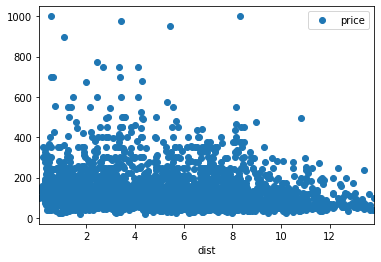

In [578]:
#Plot price vs distance for Question 1
df_listings_withDist.plot(x='dist', y='price', style='o');

We can certainly see some visual corrolation between price and distance as the higher prices which are on the vertical are scattered closer to the left - closer to the city centre = 0. As a side task, we also want to see any corrlation between number of reviews and distance to city center, which i hypothesise should have a corrolation.
number_of_reviews should be a quantitative full column mean:0.0


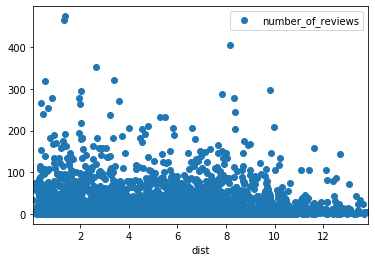

In [579]:
print("We can certainly see some visual corrolation between price and distance as the higher prices which are on the vertical are scattered closer to the left - closer to the city centre = 0. As a side task, we also want to see any corrlation between number of reviews and distance to city center, which i hypothesise should have a corrolation.")
print("number_of_reviews should be a quantitative full column mean:{}"
      .format(df_listings_withDist['number_of_reviews'].isnull().mean()))
    
df_listings_withDist.plot(x='dist', y='number_of_reviews', style='o');

the above plot is very scattered to many any conclusions.


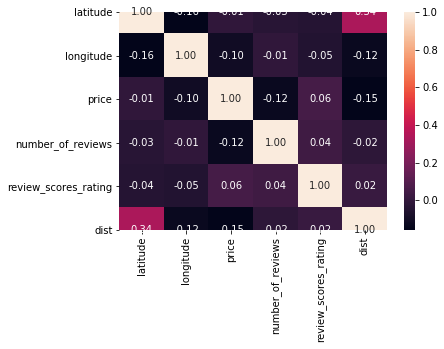

In [597]:
print("the above plot is very scattered to many any conclusions.")
# our 2nd QUESION will be to have an insight into the below
# MachineLearning will be used to see if there is any corrolation hidden within the variables to address why there is reviewing 
#traffic to come properties but not the others some categorical variables like property type, neighbourhood
# against some quantitative variables like distance to city centre, reviews and price.
sns.heatmap(df_listings_withDist.corr(), annot=True, fmt='.2f');

In [598]:
#the heatmap indicates a general lack of corrolation but we will confirm with ML

#for the X and response Y vectors for ML. Here, i want the response vector to be 'number of reviews'
#First ensure all X vetors are the same without nan vales

print("df_listings_withDist")
df_listings_withDist_dets = df_cat_and_qnt_details(df_listings_withDist)
#[0] df_cat_all_Values_ColName, [1] df_cat_missing_Values_ColName, 
#[2] df_qnt_all_Values_ColName, [3] df_qnt_missing_Values_ColName 
df_listings_withDist_dets 


df_listings_withDist
rows:  3818 Columns:  10
- Identify categorical columns in the DFs -
categorical columns:  4
- categorical columns with no missing values -
Categorical Columns with all data:  2
- Identify Quantitative columns in the DFs -
Quantitative Columns:  6
- Quantitative columns Names with no missing values -
Quantitative Columns with all data: 5



(['room_type', 'bed_type'],
 ['neighbourhood', 'property_type'],
 ['latitude', 'longitude', 'price', 'number_of_reviews', 'dist'],
 ['review_scores_rating'])

In [599]:
#from the above, we can see that the categorial 
#['neighbourhood', 'property_type'] and quantitative ['review_scores_rating'] are missing some data
df_listings_withDist.isnull().sum(axis = 0)

neighbourhood           416
latitude                  0
longitude                 0
property_type             1
room_type                 0
bed_type                  0
price                     0
number_of_reviews         0
review_scores_rating    647
dist                      0
dtype: int64

In [600]:
print("looking at the major missing data columns, we have neighbourhood and review_Scores_Raing. both missing over 5%")
print("we're going to Drop neighbourhoor and property because of their categorical nature which cannot be qantified")

#drop
df_listings_new = df_listings_withDist.drop(['property_type', 'neighbourhood'], axis=1)



looking at the major missing data columns, we have neighbourhood and review_Scores_Raing. both missing over 5%
we're going to Drop neighbourhoor and property because of their categorical nature which cannot be qantified


In [605]:
print("impute the mean of review_scores_rating into he column instead of dropping it. heatmap shows some importance to this col.")
df_listings_Full = df_listings_new.fillna(df_listings_new.review_scores_rating.mean()) #Fill all missing values with the mean of the column.
df_listings_Full.isnull().sum(axis = 0)

impute the mean of review_scores_rating into he column instead of dropping it. heatmap shows some importance to this col.


latitude                0
longitude               0
room_type               0
bed_type                0
price                   0
number_of_reviews       0
review_scores_rating    0
dist                    0
dtype: int64

In [609]:
#now that all the X vectors have values, we can compute the predition
X = df_listings_Full[['dist' ,'price', 'review_scores_rating']]
y = df_listings_Full['number_of_reviews']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Instantiate
lm_model = LinearRegression(normalize=True)
#Fit
lm_model.fit(X_train, y_train)
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for your model was 0.018581230739556198 on 1146 values.'

In [586]:
#check the average price per neighbourhood based on the property and room type
pd.DataFrame(df_listings.groupby(['neighbourhood', 'property_type', 'room_type']).mean())['price']

neighbourhood   property_type  room_type      
Alki            Apartment      Entire home/apt    126.800000
                House          Entire home/apt    218.166667
                               Private room       192.666667
                Loft           Private room       225.000000
                Townhouse      Entire home/apt    234.000000
                                                     ...    
Yesler Terrace  Apartment      Entire home/apt    155.142857
                               Private room        89.000000
                Condominium    Entire home/apt    180.000000
                               Private room        70.000000
                House          Entire home/apt    179.000000
Name: price, Length: 460, dtype: float64

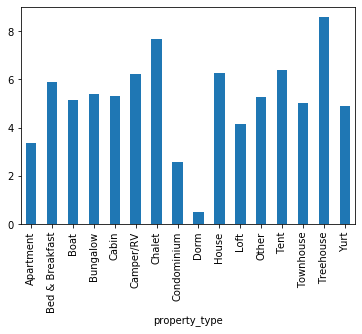

In [627]:
pd.DataFrame(df_listings_withDist.groupby(['property_type']).mean())['dist'].plot(kind="bar");